In [ ]:
# Extracción de la inforamción de los ligandos cocristalizados con la proteína CDK2

In [20]:
import pandas as pd
import numpy as np
import glob
import rdkit as rd

RDKit WARNING: [06:55:57] Enabling RDKit 2019.09.1 jupyter extensions


In [2]:
prot_name = 'cdk2'

In [3]:
# Cargamos el dataframe principal de la proteína
# Este es el DF que no tiene aun afgregados los valores AUC de las conformaciones
df_prot_labels = pd.read_json('./B_DATOS/TABLA_MTDATA_CDK2_402_crys_LIGS_INFO_LABELS.json')

In [4]:
# Identificación de los inhibidores
# Seleccionamos las conformaciones que posean algun inhibidor
filtro_inh = df_prot_labels.Inhib != '' 
df_ligs_crys = df_prot_labels[filtro_inh]

In [5]:
# Número total de conformaciones con algún ligando en el sitio activo
df_ligs_crys.shape

(367, 15)

In [7]:
# Identificamos el número de ligandos únicos
ligs_crys_prot = set(df_prot_labels.Inhib)
len(ligs_crys_prot )

318

In [125]:
# Web scrapping de los ligandos
import urllib.request
from bs4 import BeautifulSoup
from chembl_webresource_client.new_client import new_client
import pubchempy

In [39]:
URL_PDB = 'http://www.rcsb.org/ligand'

In [132]:
# Generamos un diccionario con 
dic_ligs_crys_prot = {}

for ligando in ligs_crys_prot:
    url_lig = F'{URL_PDB}/{ligando}'
    print(F'Procesando al ligando: {ligando}\n')
    # Extraemos los datos del html del ligando
    lig_data = urllib.request.urlopen( url_lig ).read().decode()
    # Minamos el html con BSoup para obtener el InChIKey
    # InChIKey
    soup = BeautifulSoup(lig_data)
    inchi_key = soup.find("tr", {"id": "chemicalInChIKey"})
    inchi_key_str = inchi_key.find('td').text
    # InChI
    inchi = soup.find("tr", {"id": "chemicalInChI"})
    inchi_str = inchi.find('td').text
    # isomeric SMILE (por si no se encuentra en la API de PbCh)
    smiles = soup.find("tr", {"id": "chemicalIsomeric"})
    smiles_str = smiles.find('td').text
    # Peso molecular
    mw = soup.find("tr", {"id": "chemicalMolecularWeight"})
    mw_str = mw.find('td').text
    # **** CHEMBL ***
    # Procedemos a extraer los datos del Chembl
    molecule = new_client.molecule
    try:
        chblMol_info = molecule.get(inchi_key_str)
        chembl_id = chblMol_info['molecule_chembl_id']
    except:
        print(F'No se pudo obtener infor de CEHMBL: {ligando}')
        print(inchi_str + '\n')
        chblMol_info = None
        chembl_id = None
    # *** PUCHEM ***
    try:
        pbch_mol = pubchempy.get_compounds(inchi_str, 'inchi')[0]
        pbch_cid = pbch_mol.cid
        pbch_data = pbch_mol.to_dict()
        canonical_smiles = pbch_mol.canonical_smiles
    except:
        print(F'Fallo con datos PUBCHEM: {ligando}')
        pbch_mol = None
        pbch_cid = None
        pbch_data = None
        canonical_smiles = None
    # Creamos la entrada para el diccionario
    # Primero el diccionario del ligando
    dic_lig = {'inchi_key': inchi_key_str,
               'inchi': inchi_str,
               'molecular_weight': float(mw_str),
               'canonical_smiles': canonical_smiles,
               'isomeric_similes': smiles_str,
               'chembl_id': chembl_id,
               'chembl_data': chblMol_info,
               'pubchem_id': pbch_cid,
               'pubchem_data': pbch_data,}
    # Anidamos el dict  del ligando al dic principal
    dic_ligs_crys_prot[ligando] = dic_lig

Procesando al ligando: L0F

Procesando al ligando: T3C

Procesando al ligando: HGW

No se pudo obtener infor de CEHMBL: HGW
InChI=1S/C4H3IN2/c5-4-1-6-3-7-2-4/h1-3H

Procesando al ligando: X88

Procesando al ligando: UN4

Procesando al ligando: IM9

Procesando al ligando: HH5

No se pudo obtener infor de CEHMBL: HH5
InChI=1S/C5H4IN5/c6-3-2-4(9-1-8-2)11-5(7)10-3/h1H,(H3,7,8,9,10,11)

Procesando al ligando: T2A

Procesando al ligando: 404

Procesando al ligando: 0BY

Procesando al ligando: 2KD

Procesando al ligando: 48K

Procesando al ligando: EZV

Procesando al ligando: DT1

Procesando al ligando: QQ2

No se pudo obtener infor de CEHMBL: QQ2
InChI=1S/C24H27ClN6O2/c1-17-4-9-21(25)22(12-17)31(11-10-26)24-13-23(27-16-28-24)29-18-5-7-20(8-6-18)33-15-19(32)14-30(2)3/h4-9,12-13,16,19,32H,11,14-15H2,1-3H3,(H,27,28,29)/t19-/m1/s1

Procesando al ligando: 0BX

Procesando al ligando: Z04

No se pudo obtener infor de CEHMBL: Z04
InChI=1S/C16H19N7O4/c17-15(24)11-5-14(23(25)26)13(22-1-3-27-4-2-22)6-1

Procesando al ligando: 09K

Procesando al ligando: Z30

No se pudo obtener infor de CEHMBL: Z30
InChI=1S/C12H20N4O/c1-12(2,3)7-4-5-9-8(6-7)10(16-15-9)11(17)14-13/h7H,4-6,13H2,1-3H3,(H,14,17)(H,15,16)/t7-/m1/s1

Procesando al ligando: RJI

No se pudo obtener infor de CEHMBL: RJI
InChI=1S/C11H9N3O4/c12-8(15)7-9(16)13-11(18)14(10(7)17)6-4-2-1-3-5-6/h1-5,7H,(H2,12,15)(H,13,16,18)/t7-/m0/s1

Procesando al ligando: 7YG

Procesando al ligando: D31

Procesando al ligando: X62

No se pudo obtener infor de CEHMBL: X62
InChI=1S/C12H9Cl2N5O3/c13-8-2-9(7(11(15)20)1-10(8)19(21)22)16-3-6-4-17-12(14)18-5-6/h1-2,4-5,16H,3H2,(H2,15,20)

Procesando al ligando: X6A

No se pudo obtener infor de CEHMBL: X6A
InChI=1S/C12H11ClN6O3/c13-8-2-9(7(11(14)20)1-10(8)19(21)22)16-3-6-4-17-12(15)18-5-6/h1-2,4-5,16H,3H2,(H2,14,20)(H2,15,17,18)

Procesando al ligando: 3TI

Procesando al ligando: PO5

No se pudo obtener infor de CEHMBL: PO5
InChI=1S/C25H30N8O3/c1-31(2)16-19(34)17-36-20-5-3-18(4-6-20)28-25-26-10-9-22(29-25)

Procesando al ligando: LS1

Procesando al ligando: 18Z

No se pudo obtener infor de CEHMBL: 18Z
InChI=1S/C18H25N9O3/c19-17(28)13-7-16(27(29)30)15(22-3-6-26-4-1-21-2-5-26)8-14(13)23-9-12-10-24-18(20)25-11-12/h7-8,10-11,21-23H,1-6,9H2,(H2,19,28)(H2,20,24,25)

Procesando al ligando: C94

Procesando al ligando: X0A

No se pudo obtener infor de CEHMBL: X0A
InChI=1S/C15H12ClN5O/c16-9-6-7-12(22)11(8-9)13-19-14(17)21-15(20-13)18-10-4-2-1-3-5-10/h1-8,22H,(H3,17,18,19,20,21)

Procesando al ligando: TJF

Procesando al ligando: FAP

No se pudo obtener infor de CEHMBL: FAP
InChI=1S/C21H23F2N5O2/c1-28(2)11-15(29)12-30-16-8-6-14(7-9-16)26-19-10-20(25-13-24-19)27-21-17(22)4-3-5-18(21)23/h3-10,13,15,29H,11-12H2,1-2H3,(H2,24,25,26,27)/t15-/m0/s1

Procesando al ligando: A28

Procesando al ligando: X42

Procesando al ligando: N41

Procesando al ligando: 56H

Procesando al ligando: 04Z

Procesando al ligando: 6SC

Procesando al ligando: U55

No se pudo obtener infor de CEHMBL: U55
InChI=1S/C10H11N5O2S/c11-

Procesando al ligando: F18

No se pudo obtener infor de CEHMBL: F18
InChI=1S/C9H10N6O/c10-8-7(9(11)15-14-8)13-12-5-1-3-6(16)4-2-5/h1-4,16H,(H5,10,11,14,15)/b13-12-

Procesando al ligando: Z71

No se pudo obtener infor de CEHMBL: Z71
InChI=1S/C16H13F2N5O3S2/c17-8-5-9(18)7-11(6-8)21-15(24)13-14(19)23-16(27-13)22-10-1-3-12(4-2-10)28(20,25)26/h1-7H,19H2,(H,21,24)(H,22,23)(H2,20,25,26)

Procesando al ligando: 628

Procesando al ligando: LZ9

Procesando al ligando: 12Z

Procesando al ligando: Z31

Procesando al ligando: 6AF

No se pudo obtener infor de CEHMBL: 6AF
InChI=1S/C17H21BrN4O3S/c1-10(23)11(2)25-16-15(18)9-20-17(22-16)21-12-3-5-13(6-4-12)26(19,24)14-7-8-14/h3-6,9-11,14,19,23H,7-8H2,1-2H3,(H,20,21,22)/t10-,11-,26+/m1/s1

Procesando al ligando: T9N

Procesando al ligando: CT7

No se pudo obtener infor de CEHMBL: CT7
InChI=1S/C13H11ClN4O2S/c1-21(19,20)10-4-2-9(3-5-10)16-13-8-11(14)17-12-6-7-15-18(12)13/h2-8,16H,1H3

Procesando al ligando: 292

Procesando al ligando: X35

Procesando al l

In [12]:
# Guardamos el set de datos en formato json
import pickle
import os

nombre_archivo = './B_DATOS/LIGS_CDK2_crys_pubchem_chembl_data.pkl'
if not os.path.exists(nombre_archivo):
    with open(nombre_archivo, 'wb') as dic_file:
        pickle.dump(dic_ligs_crys_prot, dic_file, protocol=pickle.HIGHEST_PROTOCOL)
else:
    print("El archivo ya ha sido creado.")

El archivo ya ha sido creado.


In [16]:
# Lectura del diccionario con pickle
nombre_archivo = './B_DATOS/LIGS_CDK2_crys_pubchem_chembl_data.pkl'
with open(nombre_archivo, 'rb') as dic_file:
    dic_ligs_crys_prot = pickle.load(open(nombre_archivo, 'rb'))

In [17]:
# Ejemplo de visualización
len(dic_ligs_crys_prot)

317

ID Chembl: CHEMBL388978
ID Pubchem: 44259
Nombre: STAUROSPORINE


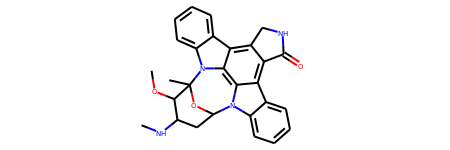

In [21]:
# Obtención del un ligando a través de una conformación
lig_1aq1 = df_ligs_crys.loc['1aq1', 'Inhib']
# Imprimimos su nombre y otros datos interesantes
lig_1aq1_data = dic_ligs_crys_prot[lig_1aq1]
print(F'ID Chembl: {lig_1aq1_data["chembl_id"]}')
print(F'ID Pubchem: {lig_1aq1_data["pubchem_id"]}')
print(F'Nombre: {lig_1aq1_data["chembl_data"]["pref_name"]}')
# Obtenemos el smiles canonico
lig_1aq1_smiles = dic_ligs_crys_prot[lig_1aq1]['canonical_smiles']
# Lo visualizamos con rdkit
rd.Chem.MolFromSmiles(lig_1aq1_smiles)

In [22]:
lig_1aq1_data

{'inchi_key': 'HKSZLNNOFSGOKW-FYTWVXJKSA-N',
 'inchi': 'InChI=1S/C28H26N4O3/c1-28-26(34-3)17(29-2)12-20(35-28)31-18-10-6-4-8-14(18)22-23-16(13-30-27(23)33)21-15-9-5-7-11-19(15)32(28)25(21)24(22)31/h4-11,17,20,26,29H,12-13H2,1-3H3,(H,30,33)/t17-,20-,26-,28+/m1/s1',
 'molecular_weight': 466.53,
 'canonical_smiles': 'CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC',
 'isomeric_similes': 'CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3c3c4CNC(=O)c4c4c5ccccc5n2c4c13',
 'chembl_id': 'CHEMBL388978',
 'chembl_data': {'atc_classifications': [],
  'availability_type': '-1',
  'biotherapeutic': None,
  'black_box_warning': '0',
  'chebi_par_id': 15738,
  'chirality': '-1',
  'cross_references': [{'xref_id': '125299371',
    'xref_name': 'SID: 125299371',
    'xref_src': 'PubChem'},
   {'xref_id': '134959007',
    'xref_name': 'SID: 134959007',
    'xref_src': 'PubChem'},
   {'xref_id': '172131318',
    'xref_name': 'SID: 172131318',
    'xref_src': 'PubChem'},
   {'xref_id': 

# DUD PRUEBAS

In [23]:
#Convertir el archivo mol2 a sdf para poserlo parsear con rdkit
dud_actives = '../ARCHIVOS/CRISTALES/LIGS_CDK2/DUDE_DECOYS/DUD_2006/dud_ligands2006/cdk2_ligands'

In [184]:
%%bash -s "$dud_actives"
obabel -imol2 ${1}.mol2 -osmi -O ${1}.smi

72 molecules converted


In [148]:
a = rd.Chem.SDMolSupplier(dud_actives + '.sdf', False)

In [159]:
contador_lineas = 0
s = set()
with open(F'{dud_actives}.smi', "r") as file:
    for i, line in enumerate(file):
        contador_lineas += 1
        s.add(line)
contador_lineas
len(s)

58

In [296]:
# Extremos del set los smiles
dic_dud_mols = {}
# ordenamos el set
set_ordenado = sorted(s, key = lambda x: int(x.replace('\n', '').split('ZINC')[1]))
for i, string in enumerate(set_ordenado):
    split_string = string.replace('\n', '').split('\t')
    mol_name = F'{i}_{split_string[1]}'
    mol_smile = split_string[0]
    mol_rdkit = rd.Chem.MolFromSmiles(mol_smile, False)
    dic_dud_mols[mol_name] = mol_rdkit

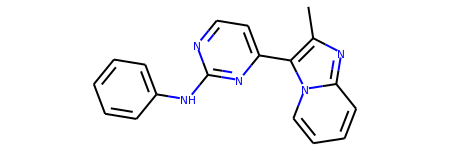

In [299]:
dic_dud_mols['25_ZINC03814452']

RDKit ERROR: [10:52:11] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6 7 8
RDKit ERROR: 


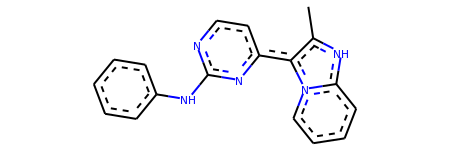

In [303]:
dic_dud_mols['26_ZINC03814452']

In [304]:
# Un set para ver si hay repetidos en los smiles
set_smiles = set()
for i in dic_dud_mols:
    set_smiles.add(i)
    
len(set_smiles) == len(dic_dud_mols)

True

In [305]:
# Extraemos los smiles de los activos de DUD
dud_smiles_iso = []
for key,smi in dic_dud_mols.items():
    smi = rd.Chem.MolToSmiles(smi, isomericSmiles=True)
    dud_smiles_iso.append( smi )

#dud_smiles_iso

In [306]:
# Generamos el diccionario de moléculas cocristalizadas 
dic_crys_mols = {}
for key in dic_ligs_crys_prot:
    # Usamos el smile isomérico, pues no de todos los ligandos fue posible obtener el canónico
    # Debido a que el API de Chembl no está actualizada (moleculas depositadas en 2019 suelen dar error)
    # Aunque rdkit, puede proveerlo una vez cargada la molécula
    smile = dic_ligs_crys_prot[key]['isomeric_similes']
    mol = rd.Chem.MolFromSmiles(smile, False)
    dic_crys_mols[key] = mol

len(dic_crys_mols )

317

In [307]:
# Extraemos los smiles canónicos de las moléculas cocristalizadas
crys_smiles_iso = []
for key,smi in dic_crys_mols.items():
    smi = rd.Chem.MolToSmiles(smi, isomericSmiles=True )
    crys_smiles_iso.append( smi)

#crys_smiles_iso

In [272]:
# preguntamos qué moléculas
for dud in dud_smiles_iso:
    if dud in crys_smiles_iso:
        #print('1')

SyntaxError: unexpected EOF while parsing (<ipython-input-272-6885ce898f12>, line 4)

In [308]:
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

In [309]:
dic_fps_dud = {i: rd.Chem.RDKFingerprint(j) for i, j in dic_dud_mols.items()}
dic_fps_crys = {i: rd.Chem.RDKFingerprint(j) for i, j in dic_crys_mols.items()}

In [310]:
DataStructs.FingerprintSimilarity(dic_fps_dud['0_ZINC00003491'], dic_fps_crys['ATP'])

0.2589105581708137

In [323]:
contador_sim = 0
cutoff = 1
# Comparamos similitud entre los ligandos
for name_dud, fps_dud in dic_fps_dud.items():
    for name_crys, fps_crys in dic_fps_crys.items():
        # Comparamos ambas estructuras usando los fingerprints
        similarity = DataStructs.FingerprintSimilarity(fps_dud, fps_crys)
        if similarity >= cutoff:
            contador_sim += 1
            print(contador_sim, name_dud, name_crys)

1 1_ZINC00023543 CMG
2 7_ZINC00603011 4SP
3 9_ZINC01641925 OLO
4 10_ZINC01649340 RRC
5 11_ZINC03591113 I17
6 13_ZINC03814434 STU
7 14_ZINC03814435 UCN
8 15_ZINC03814437 PVB
9 17_ZINC03814440 INR
10 19_ZINC03814443 LS1
11 20_ZINC03814444 LS2
12 21_ZINC03814447 LS4
13 22_ZINC03814449 1PU
14 24_ZINC03814451 ST8
15 31_ZINC03814457 MBP
16 34_ZINC03814460 UN4
17 35_ZINC03814461 6CP
18 36_ZINC03814462 2A6
19 41_ZINC03814467 SU9
20 42_ZINC03814467 SU9
21 51_ZINC03814479 NW1
22 52_ZINC03814479 NW1
23 56_ZINC04617747 LS5


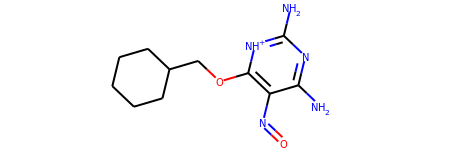

In [324]:
dic_dud_mols['51_ZINC03814479']

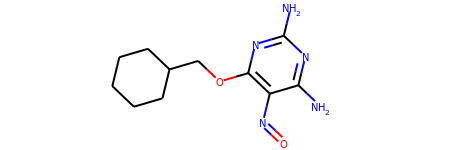

In [326]:
dic_dud_mols['52_ZINC03814479']

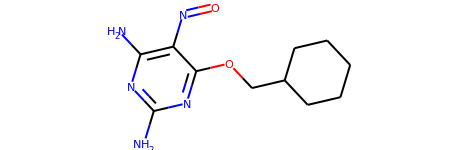

In [327]:
dic_crys_mols['NW1']

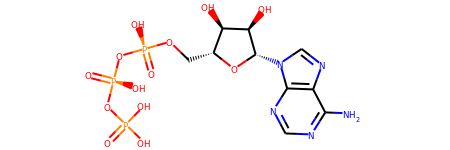

In [66]:
dic_crys_mols['ATP']

In [67]:
# Cálculo de los fingerprints